### Importing Libraries

In [101]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [102]:
data = pd.read_csv("Coursework_1_data.csv")

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

<h4>Observations:</h4>
<li>We have  12330 entries and 18 features
<li>There is no missing values in data
<li>We are having Categorical and Numerical features</li>

In [104]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Check for Imbalanced Data

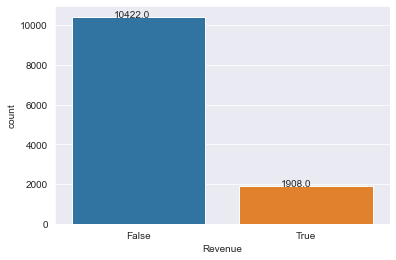

In [105]:
ax = sns.countplot(data['Revenue'])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

Observations:
Data is highly imbalanced. Only 15% are True

### Check for missing values

<AxesSubplot:>

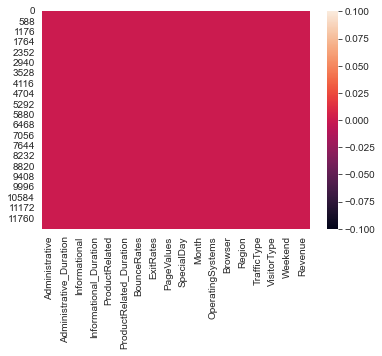

In [106]:
sns.heatmap(data.isna())

Not obseving any missing/NA values.

### Converting target variable

In [131]:
#convert target variable into numeric label
data['target'] = np.where(data['Revenue']==True, 1, 0)

## <Font size=4 color='Orange'>Exploratory Data Analysis

### Check the distribution of data

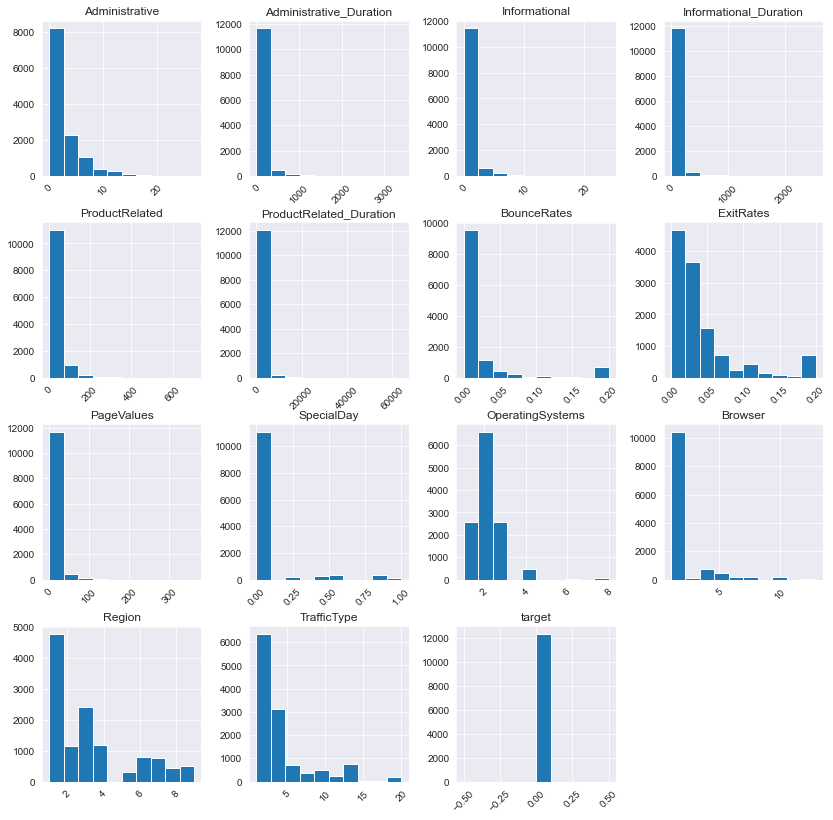

In [108]:
data.hist(figsize=(14,14),xrot=45)
plt.show()

<li>Administrative_Duration,PageValues,ProductRelated,ProductRelated_Duration,Informational duration feature having outliers</li>


### Working with Outliers

<AxesSubplot:xlabel='PageValues'>

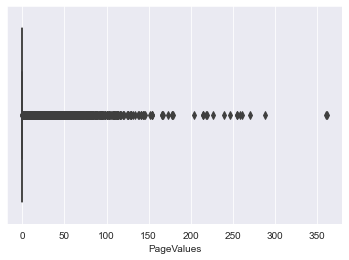

In [122]:
sns.boxplot(data['PageValues'])

In [123]:
#Check percentile of given feature and replace 99% with median value
def handle_outliers_99_percent(feature):
    print("\nFeature=",feature)
    i = 95
    while i<=100:
        print(i,"th percentile ",np.percentile(data[feature], i))
        i +=1
    treshold = np.percentile(data[feature], 99)
    median = data.loc[data[feature]<treshold,feature].median()
    percent = round(len(data[data[feature]>850])/len(data),4)
    print("Replacing",percent," % of data with median=",median," with treshold=",treshold )
    
    #data[feature] = np.where(data[feature]>treshold,median,data[feature])

In [126]:
outliers_list = ['Administrative_Duration','PageValues','ProductRelated','ProductRelated_Duration','Informational_Duration']
for feature in outliers_list:
    handle_outliers_99_percent(feature)


Feature= Administrative_Duration
95 th percentile  313.51757577999945
96 th percentile  347.61854250800013
97 th percentile  398.00866667099996
98 th percentile  471.355
99 th percentile  593.0417395309987
100 th percentile  828.0526316
Replacing 0.0  % of data with median= 6.0  with treshold= 593.0417395309987

Feature= PageValues
95 th percentile  32.8104661935
96 th percentile  38.11432810720001
97 th percentile  44.567754095799955
98 th percentile  53.106885327600004
99 th percentile  62.77056182589999
100 th percentile  84.87572674
Replacing 0.0  % of data with median= 0.0  with treshold= 62.77056182589999

Feature= ProductRelated
95 th percentile  99.0
96 th percentile  109.0
97 th percentile  122.0
98 th percentile  138.0
99 th percentile  162.0
100 th percentile  221.0
Replacing 0.0  % of data with median= 18.0  with treshold= 162.0

Feature= ProductRelated_Duration
95 th percentile  3916.3942182999967
96 th percentile  4295.06958872
97 th percentile  4834.258047649998
98 th p

We are have handled all possible outlier by replacing with median.

<AxesSubplot:xlabel='PageValues'>

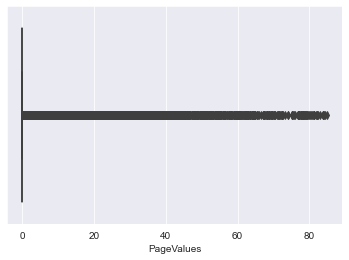

In [125]:
sns.boxplot(data['PageValues'])

From above box plot of feature PageValues we can observe that we reduced data points range from 350 to 80 by removing Outliers

### Check for Data correlation

In [127]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,target
0,0,0.0,0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0
1,0,0.0,0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0
2,0,0.0,0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0
3,0,0.0,0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0
4,0,0.0,0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0


<AxesSubplot:>

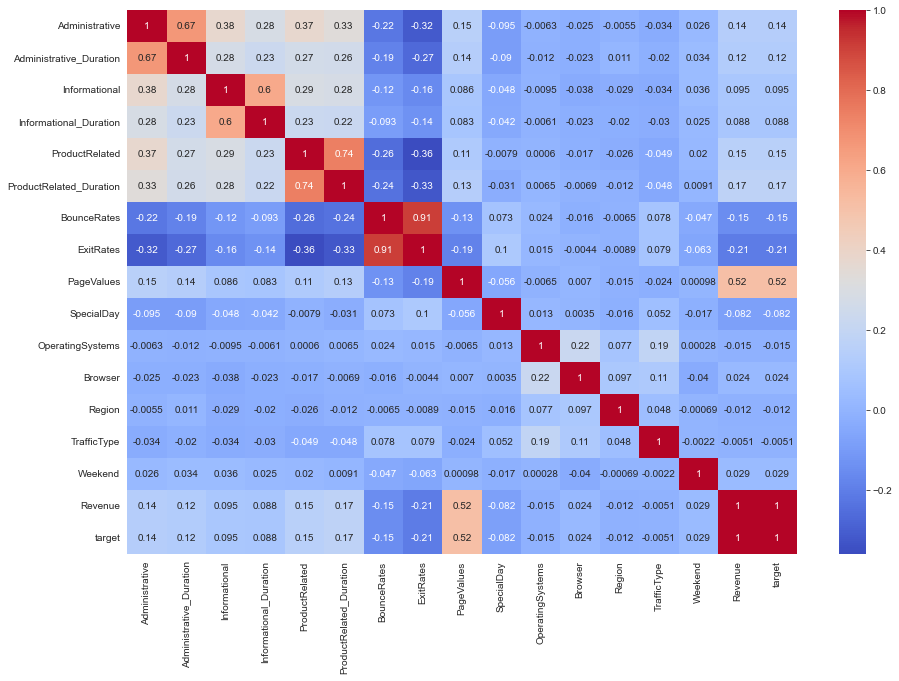

In [132]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

Categorical Features:
Trying to check which categorical feature is impacting the Revenue(Target lable)

#### Observations:
Features Weekend,TrafficType,Region,Browser,OperatingSystems are less correlaed with out Revenue/Target lable. We can delete these features.

### Drop less correlated features

In [134]:
data.drop(['Weekend','TrafficType','Region','Browser','OperatingSystems'],axis=1,inplace=True)

In [136]:
data.drop(['Revenue'],axis=1,inplace=True)

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  float64
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  VisitorType              12330 non-null  object 
 12  target                   12330 non-null  int64  
dtypes: float64(8), int64(3), object(2)
memory usage: 1.2+ MB


### Analysis on Catogorical data

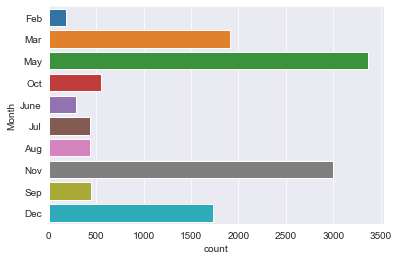

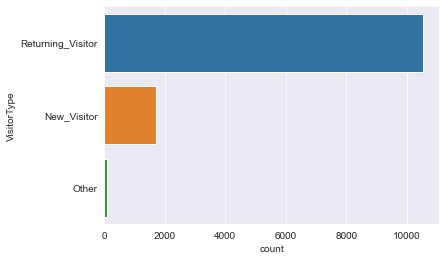

In [141]:
for column in data.select_dtypes('object'):
    if data[column].nunique() < 15:
        sns.countplot(y=column,data=data)
        plt.show()

Observations:
March,May Novemeber and December months are contributing more.
From VisitorType, we observe most of the visitors are returning vistors.

### Svae Data after EDA

In [142]:
data.to_csv('data_after_eda.csv',index=False)